[Jupyter Book](https://geo-smart.github.io/oceanography/chapters/data.html) and [GitHub repo](https://github.com/geo-smart/oceanography).


# Data


The second part of this oceanography Jupyter Book is 
concerned with methods and technical details in support of the 
science presented in the first part. 


The **`Epipelargosy`** chapter concerned the upper water column as observed
by the regional cabled array shallow profilers.


## Shallow Profiler Data


### Data types


There are two data concepts:


- Platform metadata: A record of when a profiler is at rest / ascending / descending
- Sensor data: Sensor values as a function of depth for a given profile: Salinity, temperature etcetera


We identify the sensor data of interest by pulling a time range from the platform metadata.
For this purpose we refer to a rest interval followed by ascent followed by descent as
a single shallow profiler *profile*.


### Selecting sensor data from profile metadata


Profiles take on the order of an hour for one ascent/descent cycle as the 
Science Pod traverses from the platform at a depth of 200 meters to near the surface
and back again. Typically nine profiles run per day. We consier each profile 
to be an *observation* of the state of the epipelagic water column.
A data chart of one such observation features a vertical axis for depth (with the surface at
the top) and a horizontal axis for the sensor parameter. Note that there is no time axis 
in this chart scheme.


Profile metadata is stored in a CSV file as a table of timestamps. A single profile consists
of three consecutive stages as noted: Rest, Ascent, and Descent.
(The Rest stage has the Science Pod parked in the platform at a depth of 200 meters.)
Profile metadata is read into memory as a pandas DataFrame where each row corresponds
to an entire profile. 


### Sensor data


There are about 31 million seconds in a year; and the sampling rate for many
shallow profilers is about one sample per second. As a result some data volume
management is necessary. We can, for example, work with smaller blocks of time, 
typically somewhere between one day and one month.


The current solution to managing a fairly large dataset is to create a symbolic
link (`ln -s <destination> <source>`) to an empty folder and use the `dataloader.ipynb`
notebook to populate it. Current emphasis is January 2022, Oregon Slope Base site.
This will break the Jupyter Book (as I have no comprehension of linking the 
repository to an external data volume) so that will be a problem to solve another day; 
perhaps by staging the reduced datasets to an open cloud location. 


### Summary of data management considerations


- Profile metadata is relatively small volume, resides within this Book/Repository
- Sensor data volume can be understood in terms of measurements
    - One measurement per second is typical
    - 31 million seconds per year
    - Each sensor measurement is { sensed value, pressure/depth, timestamp }
        - Sensor data also includes some quality control; typically ignored (dropped) here
    - There are about 22 sensor values
        - Most measurements are made on *ascent*, some on *descent* as noted
        - Three of these are from a fluorometer instrument
        - Two of these are nitrate measurements
        - Seven of these are spectral irradiance channels
        - Not included: Spectrophotometer data
    - Water density is a measurement derived from temperature, pressure and salinity
    - Data goes back as far as 2015
        - There are gaps in the data owing to maintenance etcetera
    - There are three shallow profiler sites
        - Coastal Endurance "Oregon Offshore" in 500m depth, distal edge of the continental shelf
        - RCA "Oregon Slope Base" at 3000m depth, bottom of the continental shelf break
        - RCA "Axial Base" at 2100m depth, further out in the Pacific at the base of Axial Seamount
- Moderate-size datasets can be stored in this repository (upper limit about 50MB)
- Large datasets can be saved external to the repository
- We use virtual or *lazy* loading of data structures using the Python `xarray` library
    - When a data file is 'read' the data are literally *not* read into memory
        - Rather a description of the data is loaded into an XArray Dataset
        - Operations on the data cause it to be *actually* read into memory
            - Lazy loading facilitates data reduction:
                - Strip away excess data elements that are not of interest
                - Time-box a subset of the data
                - Sub-sample the data to lower temporal / spatial resolution

### Repository folder structure


```
~/book/_toc.yml               -- table of contents --
       img/                   -- contains resource images --
       chapters/              -- Jupyter notebooks map to book chapters --
                data/               -- repo data storage space --
                     modis/              -- Data from the MODIS satellite system
                     argo/               -- Data from the ARGO drifter program
                     roms/               -- Data from the Regional Ocean Modeling System (ROMS)
                     rca/                -- Data from the regional cabled array--
                         profiles/       -- Profile metadata folder--
                                  axb/         -- Site subdirectories --
                                  oos/
                                  osb/
                                      2019.csv     -- Profile metadata for 2019 at the OSB site --
                         sensors/        -- Sensor (measurement) data from shallow profilers / platforms
                                 axb/            -- Axial Base site
                                 oos/            -- Oregon Offshore site
                                 osb/            -- Oregons Slope Base site (sym-link to external volume)
                                     temp_jan_22.nc       -- instrument = CTD, jan22 = time range, sensor = temperature
```


### Data resources 


Shallow profiler data was originally pulled from the [OOI Data Explorer](https://dataexplorer.oceanobservatories.org/).
This practice is now deprecated in favor of the [Interactive Oceans **Data Portal**](https://interactiveoceans.washington.edu).
The latter system includes shallow profiler data held on cloud object storage. The access pattern is described below.
The **Interactive Oceans** website has built-in data exploration and is very educator-friendly. 

### Terminology


* Regional Cabled Array (RCA): A cabled observatory on the sea floor and in select locations rising up through the water column: off the coast of Oregon
* Site: A location in the RCA
* Platform: A mechanical structure -- static or mobile -- at a site
* Instrument: A device fastened to a platform that carries one or more sensors
* Sensor: A device that measures some aspect of the ocean like pH or temperature
* Stream: Data produced by a sensor as part of an instrument located on a platform at a site in the RCA
* Profiler 'Oregon Slope Base'
* Profiler 'Axial Base' PN3A 
* Profiler 'Oregon Offshore' (shared with the OSU Endurance array)

### Sensor dictionary with abbreviations


The following table lists sensors in relation to instruments. 
Short abbreviations are included. They are sometimes used in the code to 
make it easier to read. 
Spectral irradiance is abbreviated `spkir` in OOI nomenclature. This 
data is broken out by wavelength channel (7 total) into separate sensors.
The `spec` instrument is a spectrophotometer with 83 channels. This 
is treated separate from the main collection of shallow profiler sensors. 
The `current` instrument is a platform-mounted current sensor providing
three-dimensional estimates of current with depth.


```
Short     Sensor                Name used     Instrument     Sensor operates
Abbrev.                         here          
-----     ------                -------       ----------     -----------
A         Chlorophyll-A         chlora        fluor          continuous
B         backscatter           backscatter   fluor          continuous
C         CDOM                  fdom          fluor          continuous
D         Density               density       ctd            continuous
E[]       Spec'r optical abs    oa            spec           ? (83 channels)
F[]       Spec'r beam atten     ba            spec
G         pCO2                  pco2          pco2           midnight/noon descent
H         pH                    ph            ph             midnight/noon descent
I[]       Spectral Irradiance   spkir412nm    spkir          ?
                                spkir443nm
                                spkir490nm
                                spkir510nm
                                spkir555nm
                                spkir620nm
                                spkir683nm
K         Conductivity          conductivity  ctd            continuous
N         Nitrate               nitrate       nitrate        midnight/noon ascent
P         PAR                   par           par            continuous
Q         pressure              pressure      ctd            continuous
O         dissolved oxygen      do            do             continuous
S         salinity              salinity      ctd            continuous
T         temperature           temp          ctd            continuous
U         velocity east         veast         current        continuous:
V         velocity north        vnorth                           from platform?
W         velocity up           vup                              looking up?
Z         depth = pressure      depth         ctd            see 'pressure'
```

#### Code note


This notebook refers to functions in modules `data.py` and `shallowprofiler.py`.

***Tasks***


- Does the S3 Zarr source go down on Sunday evenings? Is there a way to test if it is down?
- This section does not demonstrate profile use; but it should
- This section effectively does the profile-from-data chart twice; once is enough
- Mothball the ReformatDataFile() function in `data.py` which is part of the old Data Explorer procedure.
- Move ProfilerDepthChart() to a module file
- Look for occurrences of cdom (change to fdom) and temperature (change to temp) and conductivity (change to conduct)
- flort backscatter has multiple possibilities; I picked one; verify it is the right one with Wendi
- Deal with the code artifact below on WriteProfile()


```
# def WriteProfile(date_id):
#     fnm = '../data/osb_ctd_' + date_id + '_pressure.nc'                       
#     a0, a1, d0, d1, r0, r1 = ProfileGenerator(fnm, 'z', True)
#     # last 2 days chart check: xr.open_dataset(fnm)['z'][-1440*2:-1].plot()
#     if not ProfileWriter('../profiles/osb_profiles_' + date_id + '.csv', a0, a1, d0, d1, r0, r1): print('ProfileWriter() is False')
#    
# for date_id in ['apr21', 'jul21', 'jan22']: WriteProfile(date_id)               # !!!!! hard coded flag
```

## Profiles


This section describes profile metadata: Pre-generated and stored in this 
repository at relative path `./data/rca/profiles/<site-abbrev>`. 


- Time is UTM/Zulu.
- Typically nine profiles run per day, two of which are noticeably longer in duration
- The two longer profiles are at midnight and noon local time
    - They are associated with nitrate, pCO2 and pH measurement
    - These have built-in pauses on descent for equilibration
- During *rest* intervals the profiler is secured to the platform at 200m depth
    - The platform has its own set of instruments


Jupyter Notebook running Python 3


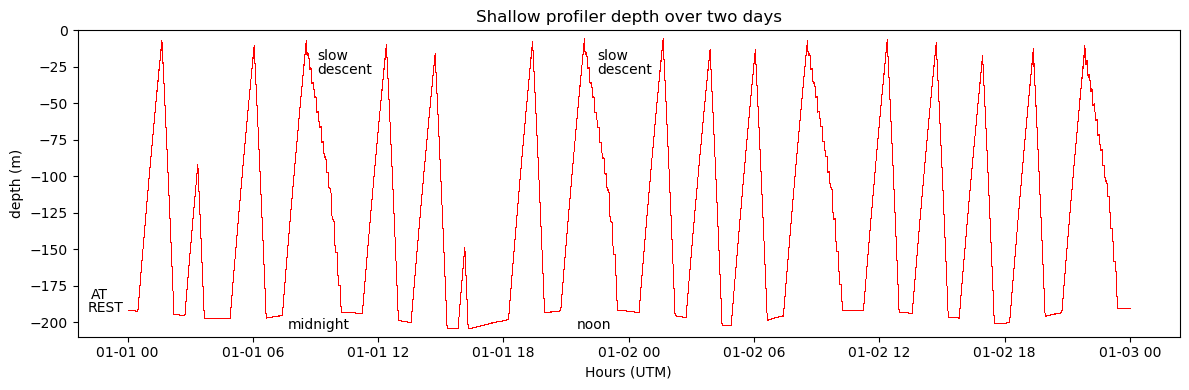

In [1]:
from matplotlib import pyplot as plt
from shallowprofiler import *
from data import *
from charts import *

RenderShallowProfilerTwoDayDepthChart()

# This code intentionally disabled: Alternative (more expansive) view of shallow profiler cycling.
if False: VisualizeProfiles('jan22', 31, '2022', '01', 'January', 'Oregon Slope Base', 'osb', 'ctd_jan22_conductivity.nc')

#### How to use profile files

- Read the file into a pandas Dataframe
- Each row is a Rest --- Ascent --- Descent phase sequence
    - Each phase has a start and an end: For a total of six events
        - There is degeneracy: r1 == a0, a1 == d0, and mostly d1 == the next row's r0
    - Each entry for these six events is a triple (i, t, z)
        - i is an index from the source file; usually ignore this
        - t is the time of the event; important
        - z is the depth of the event
            - for a1/d0 this will indicate if the profile approached the surface
    - Consequently each row has 18 columns
    
Suppose the idea is to make a depth plot of temperature for a particular profile. Select out this
profile and slice the source data using a time range given as a0 to a1. See the next notebook 
for examples.


#### Comment on profile phase durations


```
  Ascents:   67.4 +-3.0  minutes
  Descents:  vary depending: midnight/noon descents are slow (70 minutes); otherwise quick (20 minutes)
  Rests:     vary with descent, 30 / 60 minutes
```

### Example use of profile metadata


The following cell reads January 2022 Oregon Slope Base metadata into a pandas DataFrame 'profiles'.
In so doing it converts the information from text to pandas Timestamps. The rows of the resulting 
DataFrame correspond to consecutive profiles. The columns correspond to (time depth)
pairs: r0t is rest start time. r0z is depth at that time. r1t is rest end time.
r1z is depth at that time (typically close to r0z). Following this are a0, a1 for 
ascent and d0, d1 for descent. There is some degeneracy in this metadata as the 
end of the ascent corresponds to the start of the descent.

January has 31 days so there are a maximum of 279 possible profiles.

In [ ]:
profiles = ReadProfileMetadata()
profiles

In [ ]:
# profile time access syntax:
profile_row_index = 0
tA0, tA1 = profiles['a0t'][profile_row_index], profiles['a1t'][profile_row_index]
print(tA0, tA1, 'Time difference:', tA1 - tA0)
print('Type of these times:', type(tA0))

In [ ]:
ds = xr.open_dataset('./data/rca/sensors/osb/ctd_jan22_conductivity.nc')
ds_timebox = ds.sel(time=slice(tA0, tA1))
ds_timebox.conductivity.plot()

## Sensor Data


### Part 1: Deprecated OOI Data Explorer 1-minute data


In the preceding section we accessed some conductivity data from Oregon Slope Base circa
January 2022. This section connects more formally to these existing sensor datasets.



In [ ]:
base_path = './data/rca/sensors/'
date_id   = 'jan22'
site_id   = 'osb'

data_file_list = []
for s in sensors:
    data_file_list.append(base_path + site_id + '/' + s[1] + '_' + date_id + '_' + s[0] + '.nc')   # example result: 'osb/ctd_jan22_temperature.nc'

!ls -al ./data/rca/sensors/osb/ctd_jan22_conductivity.nc

# relative path to data files is base_path + site_id + '/'
# The data variables corresponding to the jan22_data filenames in data_file_list[]:
month_data_vars = [
    ['pressure'],['temperature'],['density'], ['salinity'], ['conductivity'],
    ['fdom'], ['chlora'], ['bb'],
    ['spkir412nm', 'spkir443nm', 'spkir490nm', 'spkir510nm', 'spkir555nm', 'spkir620nm', 'spkir683nm'],
    ['nitrate'],
    ['pco2'],
    ['do'],
    ['par'],
    ['ph'],
    ['up'], ['east'], ['north']
    ]

#### Dataset check


The above cell creates `data_file_list`: A list of time-bounded NetCDF sensor measurement files (in-repo). 
To review these files in more detail:
    

```
ds = xr.open_dataset(data_file_list[0])
print(ds)
```

In [ ]:
# This cell assembles a data dictionary "d" from the OOI datasets

d = {}                 # empty Python dictionary

relative_path = './data/rca/sensors/'
sitestring = 'osb'                    # available: osb = Oregon Slope Base
monthstring = 'jan22'                 # available: apr21, jul21, jan22

def GetSensorTuple(s, f):
    '''
    s is the sensor identifier string like 'temperature'
        It is actually a 2-element list: [0] is the sensor, [1] is the instrument
    f is the source filename like './../data/osb_ctd_jan22_temperature.nc' 
    '''
    df_sensor    = xr.open_dataset(f)[s]
    df_z         = xr.open_dataset(f)['z']
    range_lo     = ranges[s][0]
    range_hi     = ranges[s][1]
    sensor_color = colors[s]
    return (df_sensor, df_z, range_lo, range_hi, sensor_color)

for sensor in sensors:          # sensor is a list of 2 strings [sensor_str, instrument_str]
    f = relative_path + sitestring + '/' + sensor[1] + '_' + monthstring + '_' + sensor[0] + '.nc'
    d[sensor[0]] = GetSensorTuple(sensor[0], f)

In [ ]:
# temperature and salinity
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['conductivity']], [0], 
                          d['temperature'][0], d['temperature'][1], 'Temperature', colors['temperature'],    'ascent',
                          d['conductivity'][0],       d['conductivity'][1],    'Conductivity',  colors['conductivity'], 'ascent', 6, 4)

**Note: The above chart shows a temperature excursion to the left at a depth of about 75 meters (red). 
There is not a corresponding excursion in the salinity (cyan), this illustrating a *lack* of coincidence.**

In [ ]:
# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0], 
                          d['temperature'][0], d['temperature'][1], 'T-Ascent',   colors['temperature'],    'ascent',
                          d['temperature'][0], d['temperature'][1], 'T-Descent',  'green',                  'descent', 6, 4)

**Note: The above chart compares profile temperature on ascent (red) with the subsequent descent (green). 
The cold excursion noted above is present in both profiles. The temperature structure below 100 meters
is similar but less well-matched. This is an initial view of what we can expect for *stability*.**

### Part 2. Interactive Oceans Zarr (Lazy Load)

In [ ]:
# This cell connects to the RCA Zarr filesystem for OOI (on the cloud).
# A 'stream' is a source of one or more sensor data time series organized by
# site and by instrument. For example the CTD instrument provides temperature,
# conductivity, pressure, salinity and water density. (Some of these parameters,
# like density, are derived from the others.)

import netCDF4
import xarray as xr
import s3fs
from shallowprofiler import *
from charts import *

fs = s3fs.S3FileSystem(anon=True)

streamlist = fs.listdir('ooi-data', detail = False)

# For more on connecting to the source data: See the dataloader.ipynb notebook:
#     - data stream naming system
#     - reading in a data stream by site and instrument
#     - time range subset
#     - eliminating extraneous information 
#     - saving the result to a local (fast access) NetCDF file

In [ ]:
ds_zarr = xr.open_dataset('./data/rca/sensors/osb/temperature_jan_2022.nc')

# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0], 
                          ds_zarr.temperature, -ds_zarr.depth,
                          'T-Ascent',   colors['temperature'],    'ascent',
                          ds_zarr.temperature, -ds_zarr.depth,
                          'T-Descent',  'green',                  'descent', 6, 4)

In [ ]:
# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0], 
                          ds_zarr.temperature, -ds_zarr.depth,
                          'Zarr Data',   colors['temperature'],    'ascent',
                          d['temperature'][0], d['temperature'][1], 'OOI Data',   'blue',    'ascent', 6, 4)

Fossil code:

```
df   = ds.to_dataframe()
vals = [xr.DataArray(data=df[c], dims=['time'], coords={'time':df.index}, attrs=ds[c].attrs) for c in df.columns]
ds   = xr.Dataset(dict(zip(df.columns, vals)), attrs=ds.attrs)
```